In [34]:
## Import librarires
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.model_selection import GridSearchCV,cross_val_score
import xgboost as xgb


## Loading dataset

In [5]:
# load dataset
med_ins_df = pd.read_csv("insurance.csv")
med_ins_df.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [6]:
med_ins_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [7]:
med_ins_df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [8]:
med_ins_df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

### No null or missing values

## Data Visualization

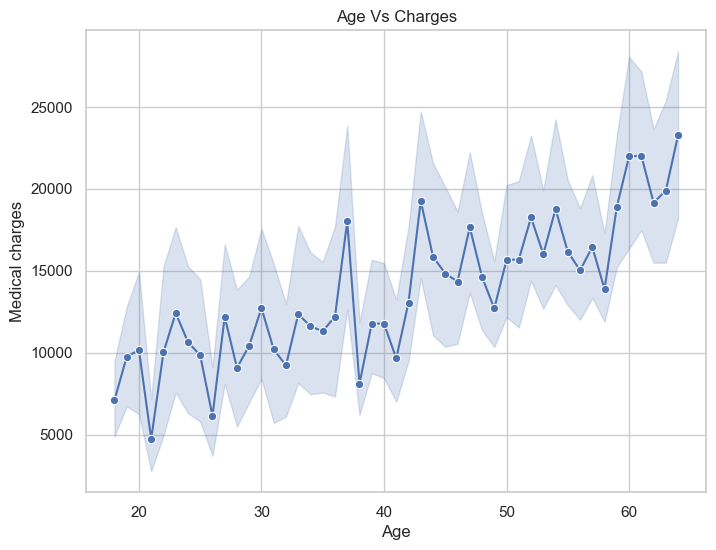

In [11]:
sns.set(style="whitegrid")  # Optional: Set the plot style

plt.figure(figsize=(8, 6))  # Optional: Set the figure size

sns.lineplot(x='age', y='charges', data=med_ins_df, marker='o', color='b')

plt.title('Age Vs Charges')
plt.xlabel('Age')
plt.ylabel('Medical charges')

plt.show()

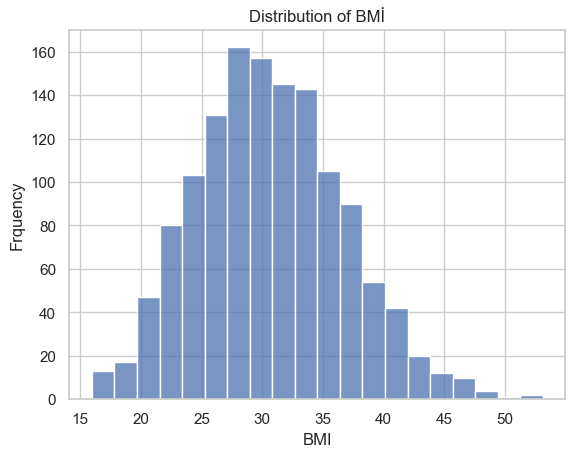

In [12]:
sns.histplot(data=med_ins_df, x='bmi', bins=20)  
plt.xlabel('BMI')
plt.ylabel('Frquency')
plt.title('Distribution of BMİ')
plt.show()

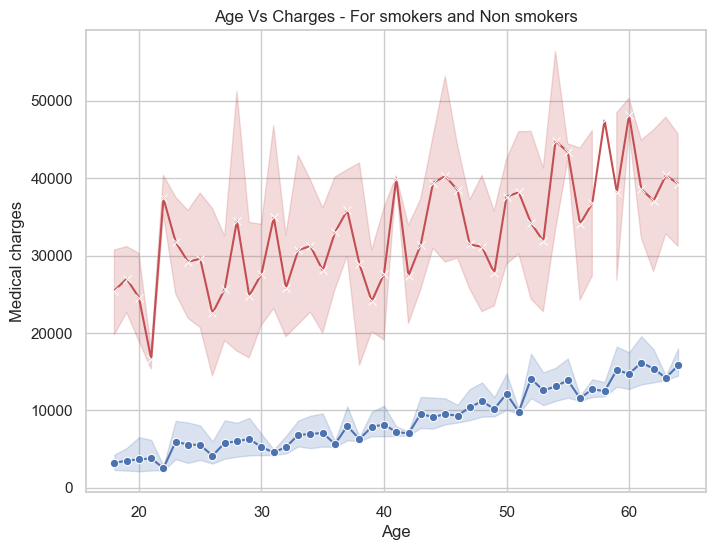

In [17]:
sns.set(style="whitegrid")  # Optional: Set the plot style

plt.figure(figsize=(8, 6))  # Optional: Set the figure size

sns.lineplot(x='age', y='charges', data=med_ins_df[med_ins_df['smoker'] == 'no'], marker='o', color='b')
sns.lineplot(x='age', y='charges', data=med_ins_df[med_ins_df['smoker'] == 'yes'], marker='x', color='r')

plt.title('Age Vs Charges - For smokers and Non smokers')
plt.xlabel('Age')
plt.ylabel('Medical charges')

plt.show()

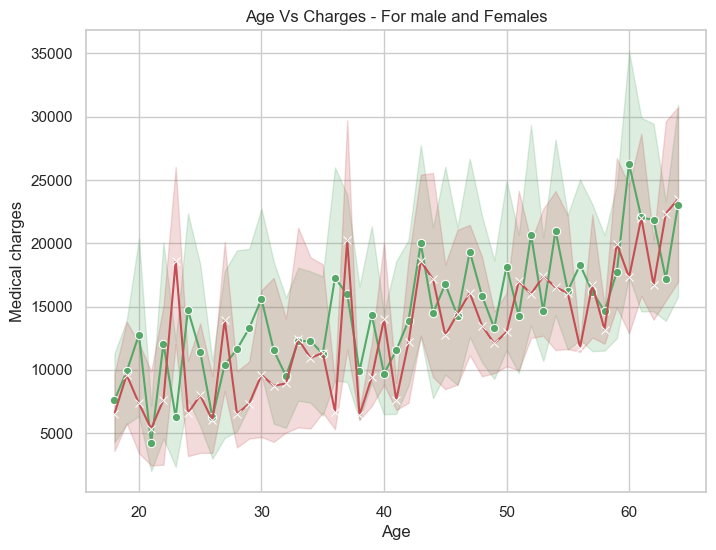

In [18]:
sns.set(style="whitegrid")  # Optional: Set the plot style

plt.figure(figsize=(8, 6))  # Optional: Set the figure size

sns.lineplot(x='age', y='charges', data=med_ins_df[med_ins_df['sex'] == 'male'], marker='o', color='g')
sns.lineplot(x='age', y='charges', data=med_ins_df[med_ins_df['sex'] == 'female'], marker='x', color='r')

plt.title('Age Vs Charges - For male and Females')
plt.xlabel('Age')
plt.ylabel('Medical charges')

plt.show()

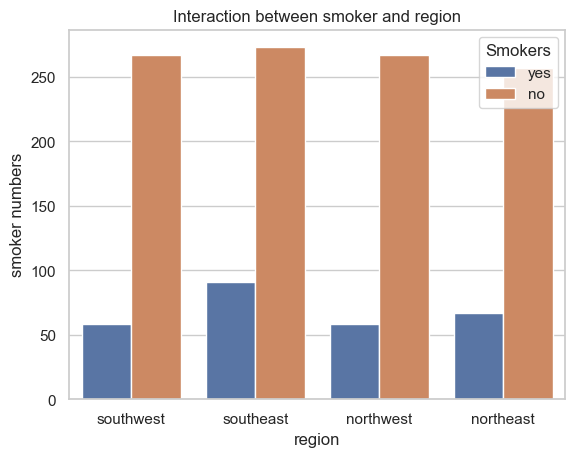

In [20]:
# The smokers by region.
# The most smokers area.

sns.countplot(data=med_ins_df,x="region", hue="smoker")
plt.xlabel('region')
plt.ylabel('smoker numbers')
plt.title('Interaction between smoker and region')
plt.legend(title="Smokers")
plt.show()

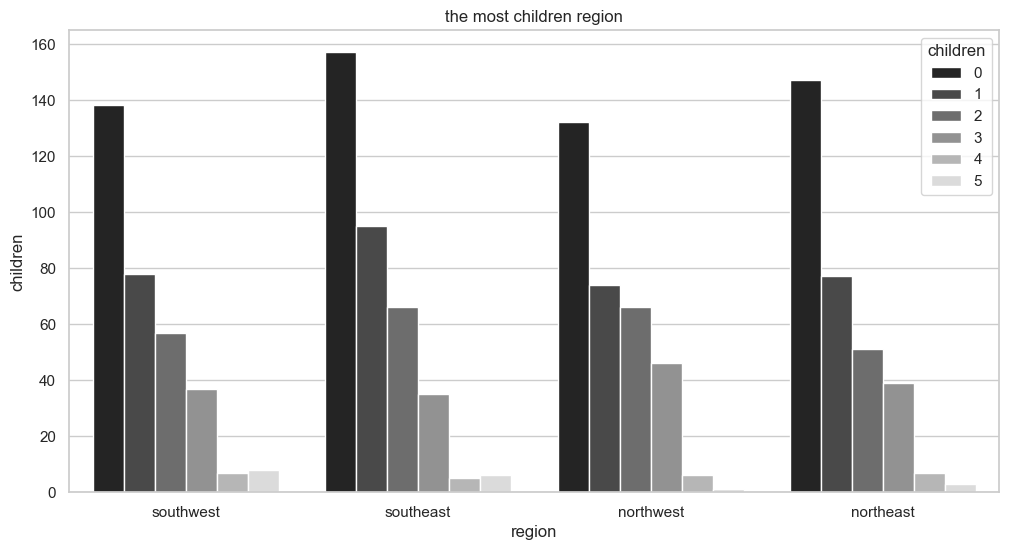

In [22]:
# Number of children by region.
# The most children area

f, axis = plt.subplots(figsize = (12,6))
sns.countplot(x='region',hue='children', palette='gist_gray',data=med_ins_df)
plt.xlabel('region')
plt.ylabel('children')
plt.title('the most children region')
plt.show()

In [24]:
#  Converting tthe Categoric values to numeric.
# get_dummies

data = pd.get_dummies(med_ins_df)

In [54]:
data

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,0,1,1,0,0,1,0,0
1334,18,31.920,0,2205.98080,1,0,1,0,1,0,0,0
1335,18,36.850,0,1629.83350,1,0,1,0,0,0,1,0
1336,21,25.800,0,2007.94500,1,0,1,0,0,0,0,1


In [26]:
X = data.drop(['charges'],axis = 1)
y = data['charges']

### train test splitting

In [27]:
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size = 0.2, 
                                                 random_state = 50)
print(X.shape,y.shape)
print(X_train.shape, y_train.shape)
print(X_test.shape,y_test.shape)

(1338, 11) (1338,)
(1070, 11) (1070,)
(268, 11) (268,)


### Feature Scaling

In [28]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler

std = StandardScaler()
X_train_scaled = std.fit_transform(X_train)
X_test_scaled = std.transform(X_test)



minmax = MinMaxScaler()
X_train_scaled = minmax.fit_transform(X_train)
X_test_scaled= minmax.transform(X_test)

In [32]:
# Best parameters and scores with GridSearchCv


scores=[]
best_estimators = {}
model_params = {  
    
    
    'linearreg': {
        'model': LinearRegression(),
        'params': {
            
            'fit_intercept': [True, False],
            
            
             }
        },
    'GradientBoostingreg':{
        'model':GradientBoostingRegressor(),
        'params':{
            'n_estimators' : [100,200,300,500],
            'learning_rate' : [0.05,0.25,0.50,1],
            'max_depth'    : [4,6,8,10],
            'min_samples_split':[2,4,5,6]
            
        }
    },
    'RandomForestreg':{
        'model':RandomForestRegressor(),
        'params':{
            'n_estimators'     : [100,200,500,800,1000],
            'min_samples_split' : [2,4,8],
            'max_depth': [None, 10, 20],
            
            }
            
        }
}

In [35]:
for mn, mp in model_params.items():
    reg = GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False)
    print(mp['model'], mp['params'])
    
    reg.fit(X_train_scaled, y_train) 
    
    scores.append({
        'model': mn,
        'best_score': reg.best_score_,
        'best_params': str(reg.best_params_)
    })
    best_estimators[mn] = reg.best_estimator_

LinearRegression() {'fit_intercept': [True, False]}
GradientBoostingRegressor() {'n_estimators': [100, 200, 300, 500], 'learning_rate': [0.05, 0.25, 0.5, 1], 'max_depth': [4, 6, 8, 10], 'min_samples_split': [2, 4, 5, 6]}
RandomForestRegressor() {'n_estimators': [100, 200, 500, 800, 1000], 'min_samples_split': [2, 4, 8], 'max_depth': [None, 10, 20]}


In [36]:
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df = df.sort_values(by='best_score',ascending=False)
df

,model,best_score,best_params
1,GradientBoostingreg,0.849492,"{'learning_rate': 0.05, 'max_depth': 4, 'min_s..."
2,RandomForestreg,0.842735,"{'max_depth': 20, 'min_samples_split': 8, 'n_e..."
0,linearreg,0.735927,{'fit_intercept': False}


In [37]:
cross_val_score(best_estimators['RandomForestreg'],X_test_scaled,y_test,cv=5).mean()

0.8415507537248115

In [38]:
cross_val_score(best_estimators['GradientBoostingreg'],X_test_scaled,y_test,cv=5).mean()

0.8292928325819544

In [39]:
cross_val_score(best_estimators['linearreg'],X_test_scaled,y_test,cv=5).mean()

0.7578048781343263

In [40]:
# Building model best params..

df.best_params[1]

"{'learning_rate': 0.05, 'max_depth': 4, 'min_samples_split': 2, 'n_estimators': 100}"

In [41]:
grd_boost_reg =GradientBoostingRegressor(n_estimators=100,min_samples_split=5,
                                            max_depth= 4,learning_rate=0.05)
grd_boost_reg.fit(X_train_scaled,y_train)
print(grd_boost_reg.score(X_train_scaled,y_train))
print(grd_boost_reg.score(X_test_scaled,y_test))

0.8994205977940474
0.8777999080398982


In [45]:
y_pred = grd_boost_reg.predict(X_test_scaled)
y_pred_df = pd.DataFrame(y_pred, columns=["Predicted Charges"])
y_pred_df

,Predicted Charges
0,6770.661389
1,6314.978432
2,13211.378272
3,11198.687357
4,5491.731898
...,...
263,5189.098000
264,6535.927906
265,12216.933523
266,17148.886018


In [44]:
y_test_real = pd.Series(y_test)
y_test_real.reset_index(drop=True, inplace=True)
y_test_real_df = pd.DataFrame(y_test_real)
new_column = {'charges': 'Actual Charges'}
y_test_real_df.rename(columns= new_column,inplace=True)
y_test_real_df

,Actual Charges
0,5976.83110
1,5846.91760
2,13831.11520
3,9625.92000
4,2680.94930
...,...
263,3392.36520
264,4931.64700
265,9724.53000
266,36580.28216


## Metrics

In [46]:
from sklearn.metrics import r2_score
r2score = r2_score(y_test_real_df, y_pred_df)
print(r2score)

0.8777999080398982


In [48]:
import pickle
pickle.dump(grd_boost_reg, open('regmodel.pkl', 'wb'))

In [50]:
pickled_model = pickle.load(open('regmodel.pkl', 'rb'))


In [70]:
predicted_value = pickled_model.predict(std.transform(X.iloc[10].values.reshape(1, -1)))


/Users/harshayarravarapu/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [71]:
predicted_value

array([3036.24590837])

In [72]:
y[10]

2721.3208